In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(16,9))
# Suppress the warnings
import warnings
warnings.filterwarnings("ignore")

<Figure size 1152x648 with 0 Axes>

## Overview

In [2]:
dollar=pd.read_csv("C:/Users/user/datasets/US Dollar Index Historical Data.csv")
dollar

Date   Price    Open    High     Low Change %
0     Jan 02, 2001  108.77  109.33  109.65  108.64   -0.72%
1     Jan 03, 2001  110.17  108.59  110.34  108.09    1.29%
2     Jan 04, 2001  108.81  110.30  110.40  108.51   -1.23%
3     Jan 05, 2001  108.42  108.64  109.31  108.26   -0.36%
4     Jan 08, 2001  108.86  108.33  109.19  108.23    0.41%
...            ...     ...     ...     ...     ...      ...
4995  Apr 28, 2020   99.86  100.06  100.21   99.45   -0.18%
4996  Apr 29, 2020   99.56   99.88   99.89   99.47   -0.30%
4997  Apr 30, 2020   99.02   99.48   99.72   98.81   -0.54%
4998  May 01, 2020   99.08   99.13   99.21   98.64    0.06%
4999  May 04, 2020   99.48   98.56   99.60   98.56    0.40%

[5000 rows x 6 columns]

## <h><b>Bigger Picture<b><h>

In [3]:
print(f"This dataset has {dollar.shape[0]} rows and {dollar.shape[1]} columns")

This dataset has 5000 rows and 6 columns


In [4]:
dollar.describe().T

count       mean        std    min      25%     50%    75%     max
Price  5000.0  89.819056  10.988109  71.33  80.7900  88.125  96.82  120.90
Open   5000.0  89.820334  10.991190  71.33  80.8175  88.155  96.81  120.76
High   5000.0  90.146750  11.023366  71.69  81.0900  88.505  97.10  121.02
Low    5000.0  89.497790  10.958374  70.70  80.5400  87.820  96.51  119.86

In [5]:
dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Change %  5000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 234.5+ KB


In [6]:
dollar.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

## General

In [7]:
corr = dollar.corr()
corr

Price      Open      High       Low
Price  1.000000  0.999264  0.999671  0.999665
Open   0.999264  1.000000  0.999657  0.999651
High   0.999671  0.999657  1.000000  0.999543
Low    0.999665  0.999651  0.999543  1.000000

<AxesSubplot:>

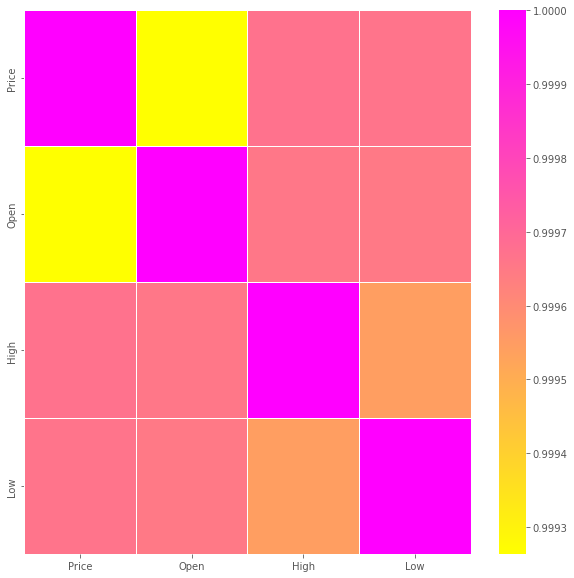

In [8]:
_,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=False,cmap="spring_r",linewidths=.5)

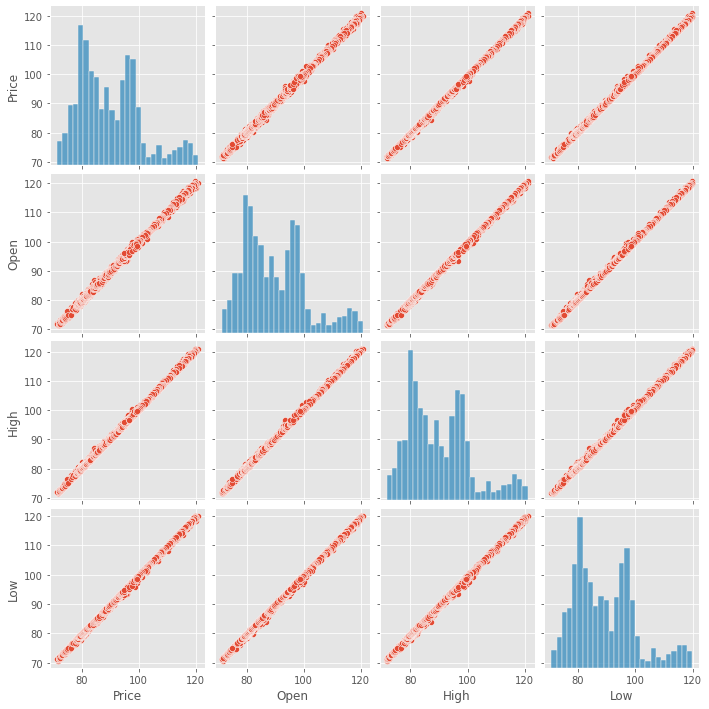

In [9]:
sns.pairplot(dollar)

## **Time Analysis**

In [10]:
# Date column type
print(type(dollar.Date))
dollar.Date = pd.to_datetime(dollar.Date)

<class 'pandas.core.series.Series'>


In [11]:
# Let us obtain the respective months and years for further analysis
dollar["Year"]=dollar.Date.dt.year
dollar["Month"]=dollar.Date.dt.month

In [12]:
# Rearrange the columns
dollar.columsn=[["Date","Year","Month","Price","Open","High","Low","Change %"]]

## **Price**

In [13]:
dollar.Price.value_counts().tail(10)

92.43     1
93.94     1
116.79    1
75.05     1
71.41     1
107.11    1
95.66     1
110.98    1
112.98    1
107.68    1
Name: Price, dtype: int64

There has been no price consistency for the last ten years

In [14]:
plt.style.use("ggplot")

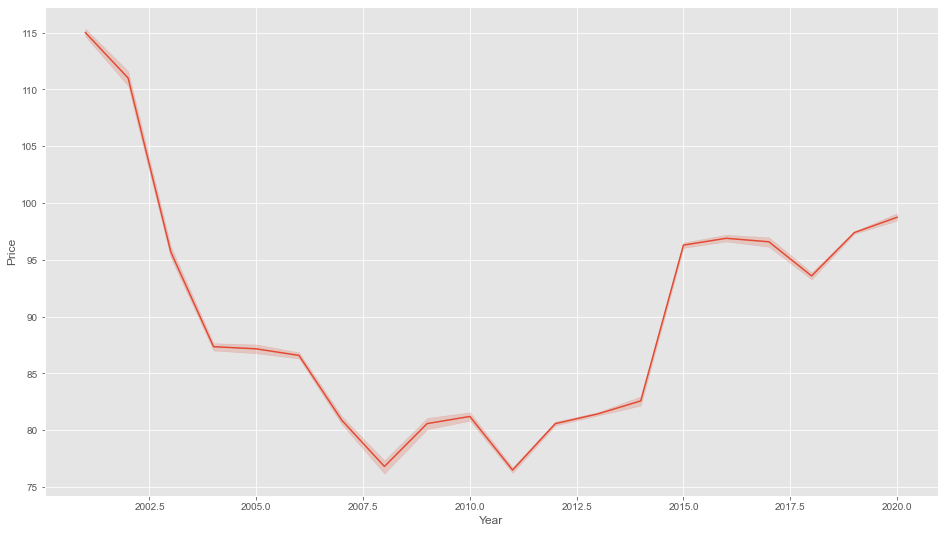

In [15]:
_,ax=plt.subplots(figsize=(16,9))
sns.lineplot(data=dollar,x="Year",y="Price")
sns.set_style("ticks")

The dollar was at the lowest in 2010

Text(0.5, 1.0, 'US Dollar Index trend 2001 - 2021')

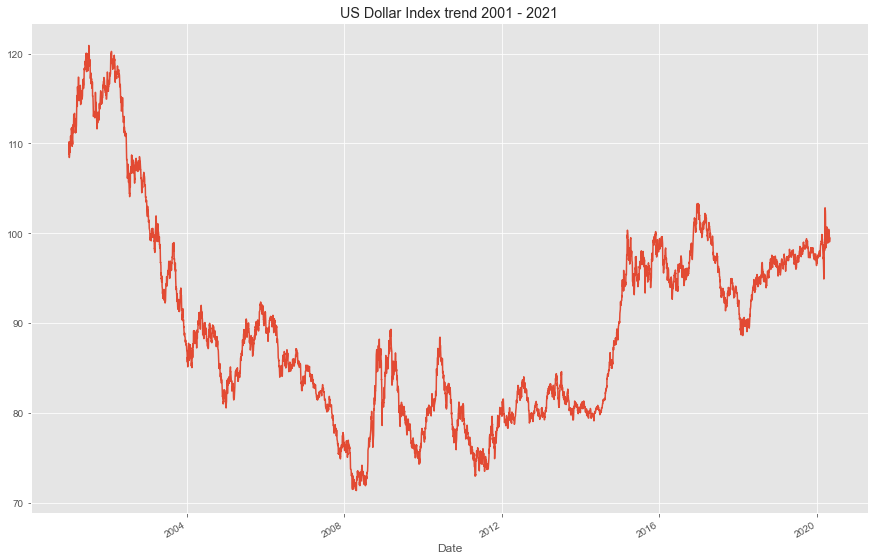

In [16]:
dol = dollar.set_index('Date')
plt.style.use("ggplot")
ax = dol['Price'].plot(figsize=(15,10))
plt.title("US Dollar Index trend 2001 - 2021")

## **Change %**

<AxesSubplot:xlabel='Year', ylabel='Change %'>

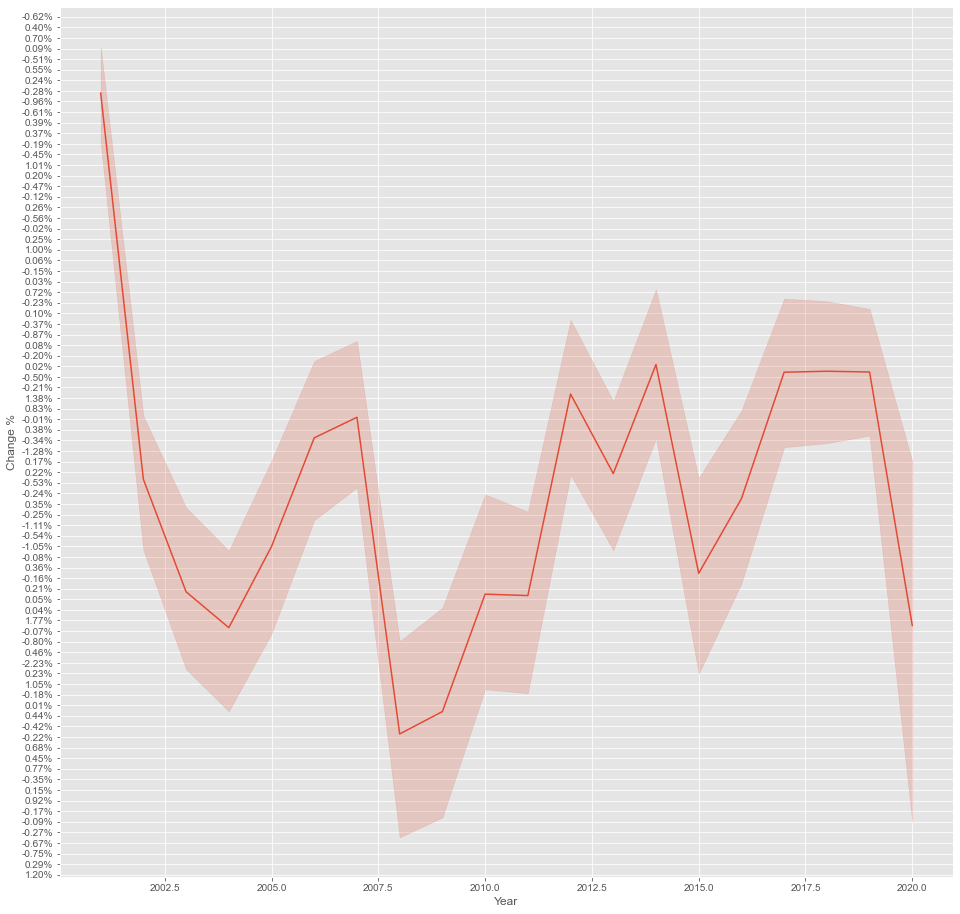

In [17]:
plt.style.use("ggplot")
_,ax=plt.subplots(figsize=(16,16))
sns.lineplot(data=dollar, x="Year", y="Change %")

## **Recessions**

In [18]:
doll = dol.copy()
doll["Month"] = doll.index.month
doll["Year"] = doll.index.year
doll

Price    Open    High     Low Change %  Year  Month
Date                                                            
2001-01-02  108.77  109.33  109.65  108.64   -0.72%  2001      1
2001-01-03  110.17  108.59  110.34  108.09    1.29%  2001      1
2001-01-04  108.81  110.30  110.40  108.51   -1.23%  2001      1
2001-01-05  108.42  108.64  109.31  108.26   -0.36%  2001      1
2001-01-08  108.86  108.33  109.19  108.23    0.41%  2001      1
...            ...     ...     ...     ...      ...   ...    ...
2020-04-28   99.86  100.06  100.21   99.45   -0.18%  2020      4
2020-04-29   99.56   99.88   99.89   99.47   -0.30%  2020      4
2020-04-30   99.02   99.48   99.72   98.81   -0.54%  2020      4
2020-05-01   99.08   99.13   99.21   98.64    0.06%  2020      5
2020-05-04   99.48   98.56   99.60   98.56    0.40%  2020      5

[5000 rows x 7 columns]

In [19]:
# Dot com bubble - Mar 2001 - Nov 2001
doll['recession'] = 'no'
doll['recession'] = np.where((doll['Month']>=3)&(doll['Month']<=11)&(doll['Year']==2001),"yes",doll['recession'])

In [20]:
# 2008 - stock market crash
doll['recession'] = np.where((doll.Year >= 2007) & (doll.Year<=2009),"yes","no")

In [21]:
# Corona
doll['recession'] = np.where((doll['Month']>= 2)&(doll['Month']<=4)&(doll['Year']==2020),"yes",doll['recession'])

In [22]:
doll.head()

Price    Open    High     Low Change %  Year  Month recession
Date                                                                      
2001-01-02  108.77  109.33  109.65  108.64   -0.72%  2001      1        no
2001-01-03  110.17  108.59  110.34  108.09    1.29%  2001      1        no
2001-01-04  108.81  110.30  110.40  108.51   -1.23%  2001      1        no
2001-01-05  108.42  108.64  109.31  108.26   -0.36%  2001      1        no
2001-01-08  108.86  108.33  109.19  108.23    0.41%  2001      1        no

Text(0.5, 1.0, 'US Dollar Index price - During Recession')

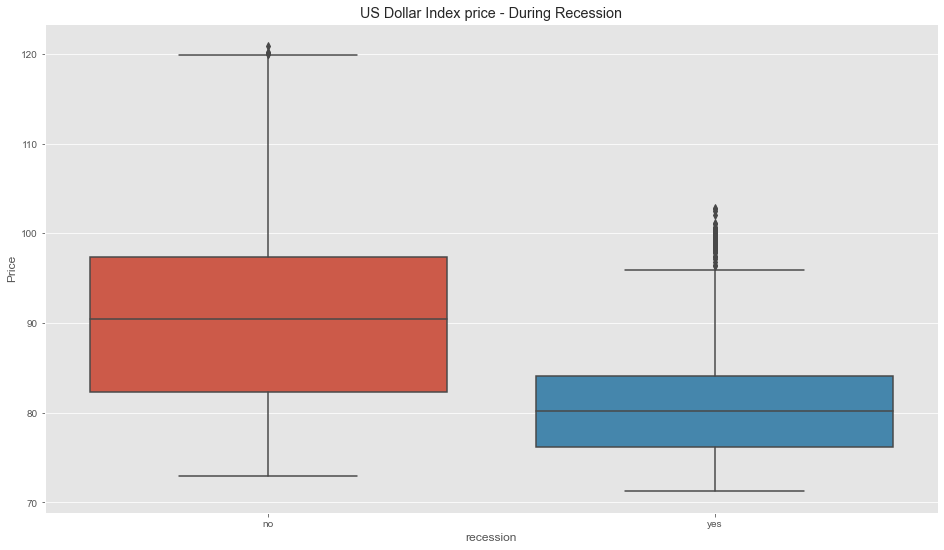

In [23]:
_,ax=plt.subplots(figsize=(16,9))
sns.boxplot(x=doll['recession'],y=doll['Price'])
plt.title("US Dollar Index price - During Recession")

Text(0.5, 1.0, 'US Dollar Index price - Yearly')

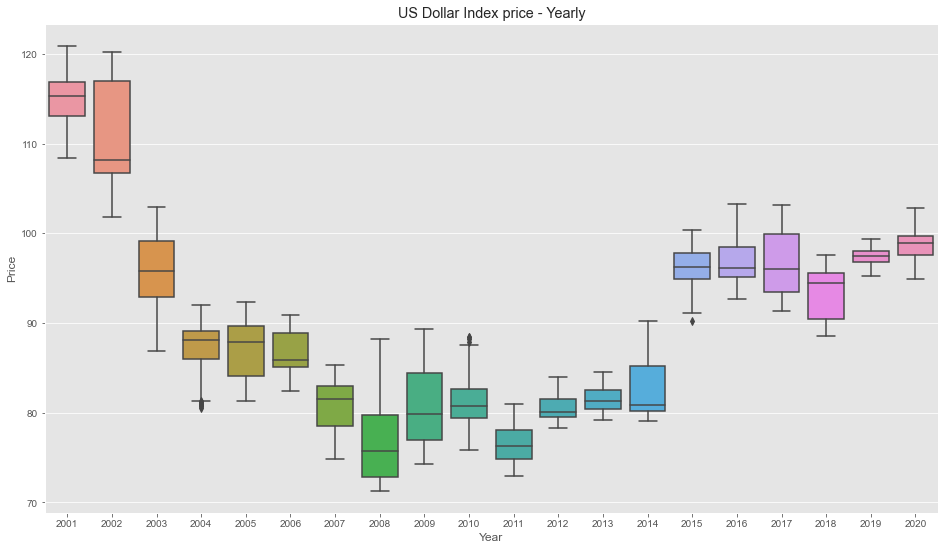

In [24]:
plt.figure(figsize=(16,9))
sns.boxplot(x=doll['Year'],y=doll['Price'])
plt.title("US Dollar Index price - Yearly")

Text(0.5, 1.0, 'US Dollar Index price - Monthly')

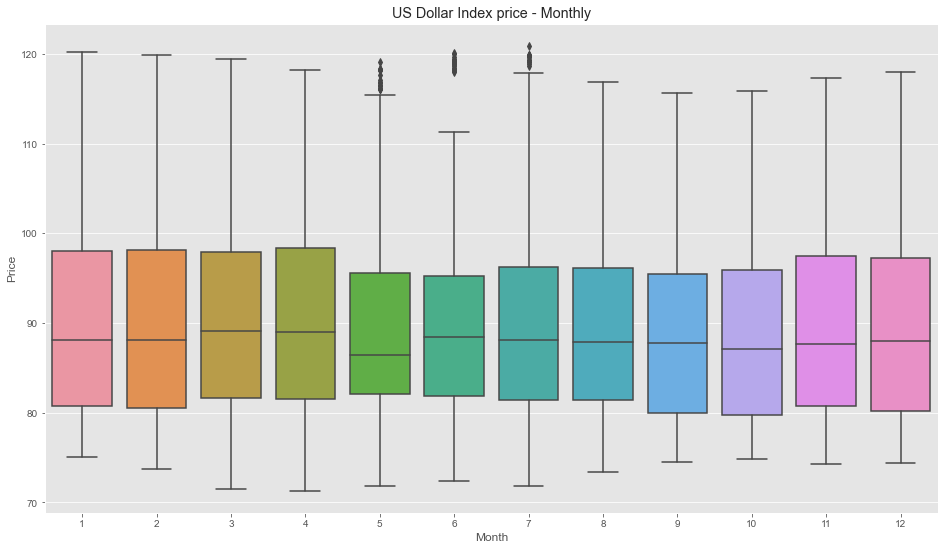

In [25]:
plt.figure(figsize=(16,9))
sns.boxplot(x=doll['Month'],y=doll['Price'])
plt.title("US Dollar Index price - Monthly")

## **Relationship Between the Market Variables**

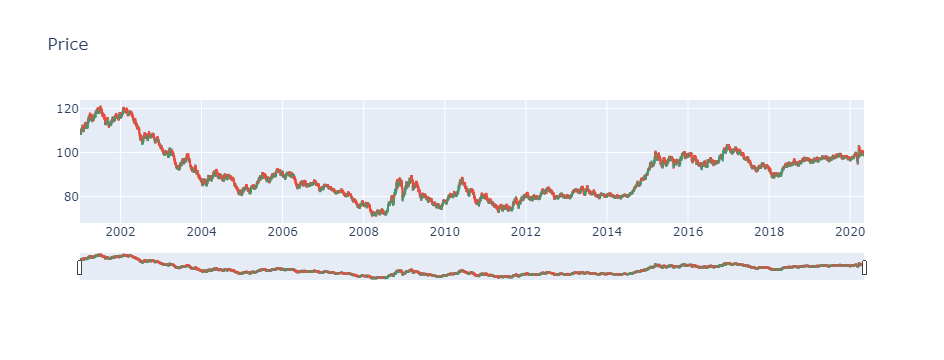

In [26]:
import plotly.graph_objects as go
from datetime import datetime

layout = go.Layout(
   title = 'Price',
   yaxis = dict(
       autorange = True,
       fixedrange= False))
    
fig = go.Figure(data=[go.Candlestick(x=doll.index,
                open=doll['Open'],
                high=doll['High'],
                low=doll['Low'],
                close=doll['Price'])],
                layout=layout)


fig.show()

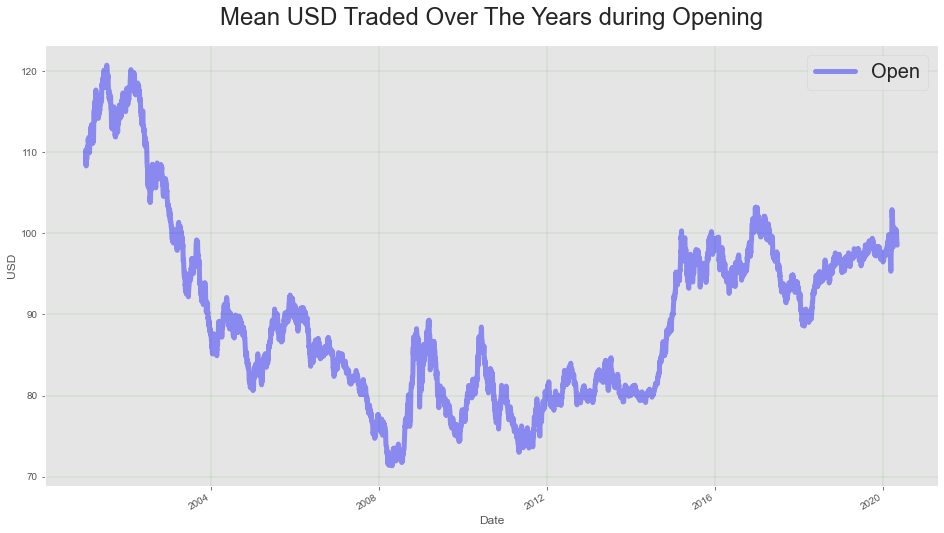

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
dollar.groupby('Date')["Open"].mean().plot(ms=8, mew=2, mec="navy", ls='-', lw=5, c="b", alpha=.4)
plt.xlabel("Date")
plt.ylabel("USD")
plt.title("Mean USD Traded Over The Years during Opening", pad=20, fontsize=24)
plt.grid(ls="-", lw=.3, alpha=.4, c="g")
plt.legend(["Open", "Date"], fontsize=20)

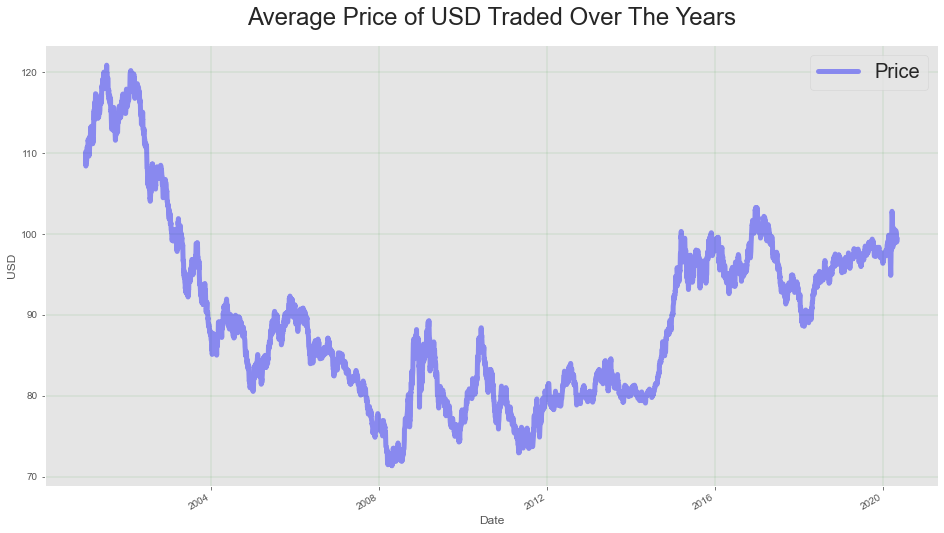

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
dollar.groupby('Date')["Price"].mean().plot(ms=8, mew=2, mec="navy", ls='-', lw=5, c="b", alpha=.4)
plt.xlabel("Date")
plt.ylabel("USD")
plt.title("Average Price of USD Traded Over The Years", pad=20, fontsize=24)
plt.grid(ls="-", lw=.3, alpha=.4, c="g")
plt.legend(["Price", "Date"], fontsize=20)

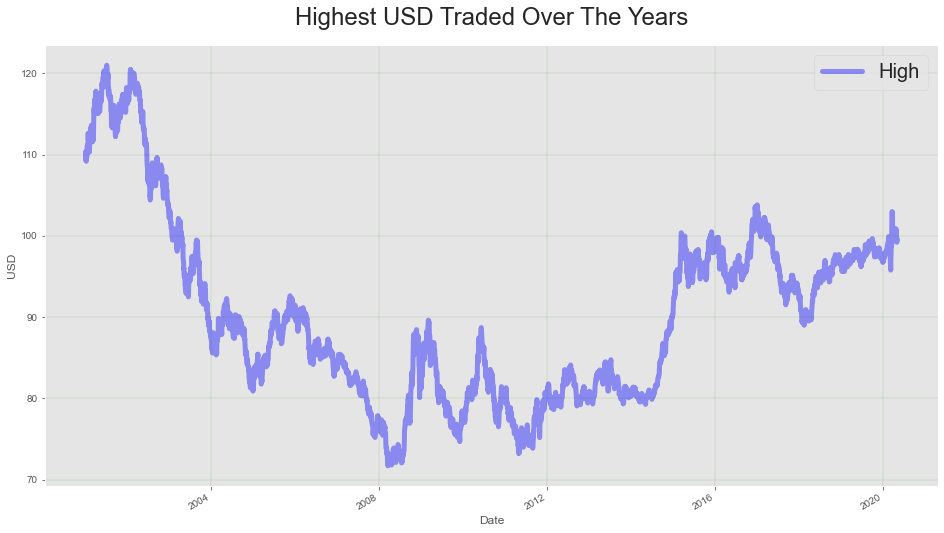

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
dollar.groupby('Date')["High"].mean().plot(ms=8, mew=2, mec="navy", ls='-', lw=5, c="b", alpha=.4)
plt.xlabel("Date")
plt.ylabel("USD")
plt.title("Highest USD Traded Over The Years", pad=20, fontsize=24)
plt.grid(ls="-", lw=.3, alpha=.4, c="g")
plt.legend(["High", "Date"], fontsize=20)

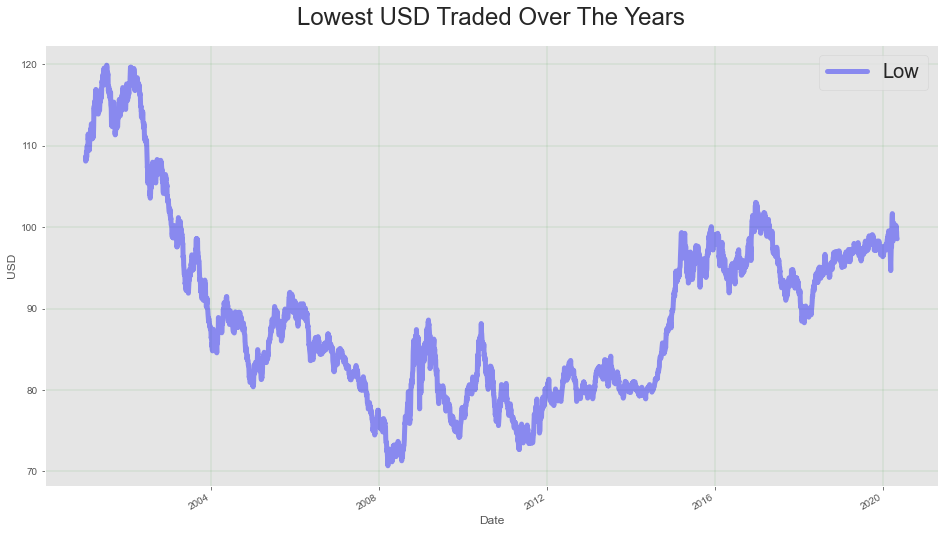

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
dollar.groupby('Date')["Low"].mean().plot(ms=8, mew=2, mec="navy", ls='-', lw=5, c="b", alpha=.4)
plt.xlabel("Date")
plt.ylabel("USD")
plt.title("Lowest USD Traded Over The Years", pad=20, fontsize=24)
plt.grid(ls="-", lw=.3, alpha=.4, c="g")
plt.legend(["Low", "Date"], fontsize=20)

In [31]:
dollar["Change %"] = dollar["Change %"].str.replace("%"," ")

In [32]:
dollar

Date   Price    Open    High     Low Change %  Year  Month
0    2001-01-02  108.77  109.33  109.65  108.64   -0.72   2001      1
1    2001-01-03  110.17  108.59  110.34  108.09    1.29   2001      1
2    2001-01-04  108.81  110.30  110.40  108.51   -1.23   2001      1
3    2001-01-05  108.42  108.64  109.31  108.26   -0.36   2001      1
4    2001-01-08  108.86  108.33  109.19  108.23    0.41   2001      1
...         ...     ...     ...     ...     ...      ...   ...    ...
4995 2020-04-28   99.86  100.06  100.21   99.45   -0.18   2020      4
4996 2020-04-29   99.56   99.88   99.89   99.47   -0.30   2020      4
4997 2020-04-30   99.02   99.48   99.72   98.81   -0.54   2020      4
4998 2020-05-01   99.08   99.13   99.21   98.64    0.06   2020      5
4999 2020-05-04   99.48   98.56   99.60   98.56    0.40   2020      5

[5000 rows x 8 columns]

In [33]:
# The trend of the dollar within the first 10 days of the market opening.
first_10_days = dollar.head(10)
first_10_days

Date   Price    Open    High     Low Change %  Year  Month
0 2001-01-02  108.77  109.33  109.65  108.64   -0.72   2001      1
1 2001-01-03  110.17  108.59  110.34  108.09    1.29   2001      1
2 2001-01-04  108.81  110.30  110.40  108.51   -1.23   2001      1
3 2001-01-05  108.42  108.64  109.31  108.26   -0.36   2001      1
4 2001-01-08  108.86  108.33  109.19  108.23    0.41   2001      1
5 2001-01-09  109.52  109.19  109.96  109.08    0.61   2001      1
6 2001-01-10  109.86  109.60  109.96  109.26    0.31   2001      1
7 2001-01-11  109.01  110.09  110.10  108.73   -0.77   2001      1
8 2001-01-12  109.36  109.07  109.62  108.56    0.32   2001      1
9 2001-01-15  109.97  109.94  110.14  109.58    0.56   2001      1

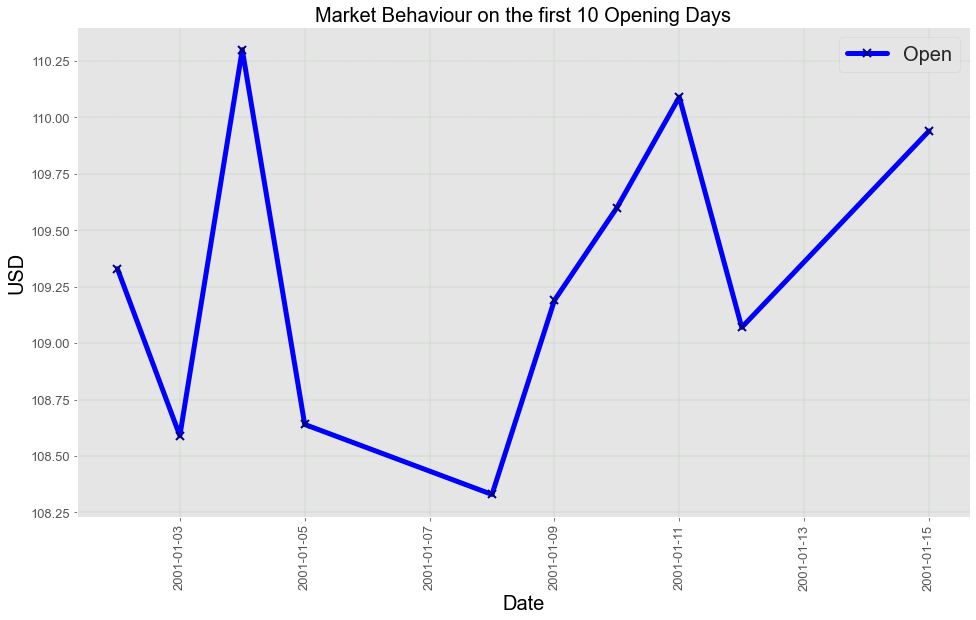

In [34]:
plt.figure(figsize=(16,9))
plt.plot(first_10_days.Date, first_10_days["Open"], marker="x", mew=2, ls='-', lw=5, c="b", ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20, c="black")
plt.ylabel("USD", fontsize=20, color="black")
plt.title("Market Behaviour on the first 10 Opening Days", fontsize=20, color="black")
plt.legend(["Open","Date"], fontsize=20)

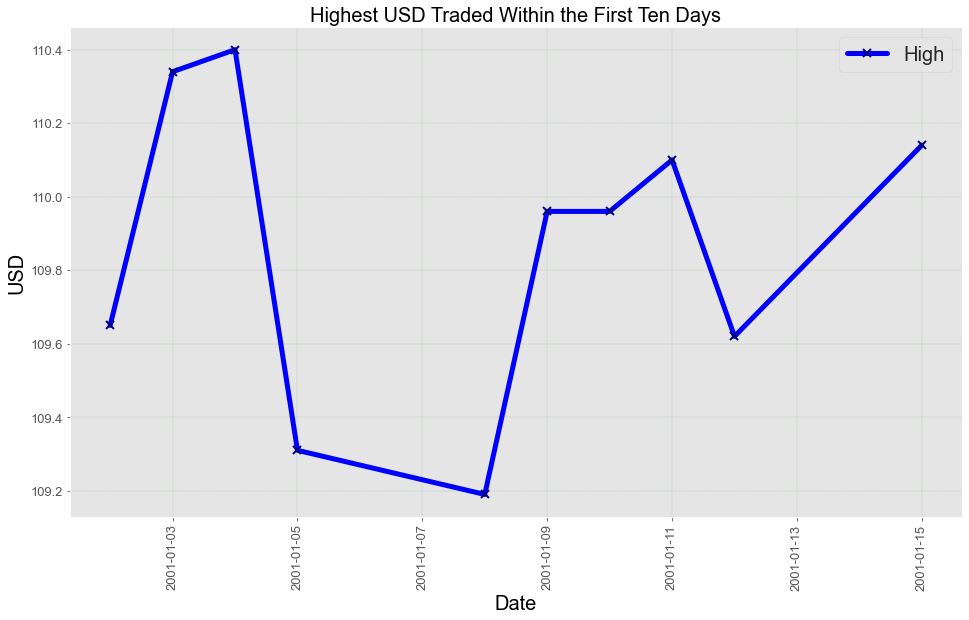

In [35]:
plt.figure(figsize=(16,9))
plt.plot(first_10_days.Date, first_10_days["High"], marker="x", mew=2, ls='-', lw=5, c="b", ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20, c="black")
plt.ylabel("USD", fontsize=20, color="black")
plt.title("Highest USD Traded Within the First Ten Days", fontsize=20, color="black")
plt.legend(["High"], fontsize=20)

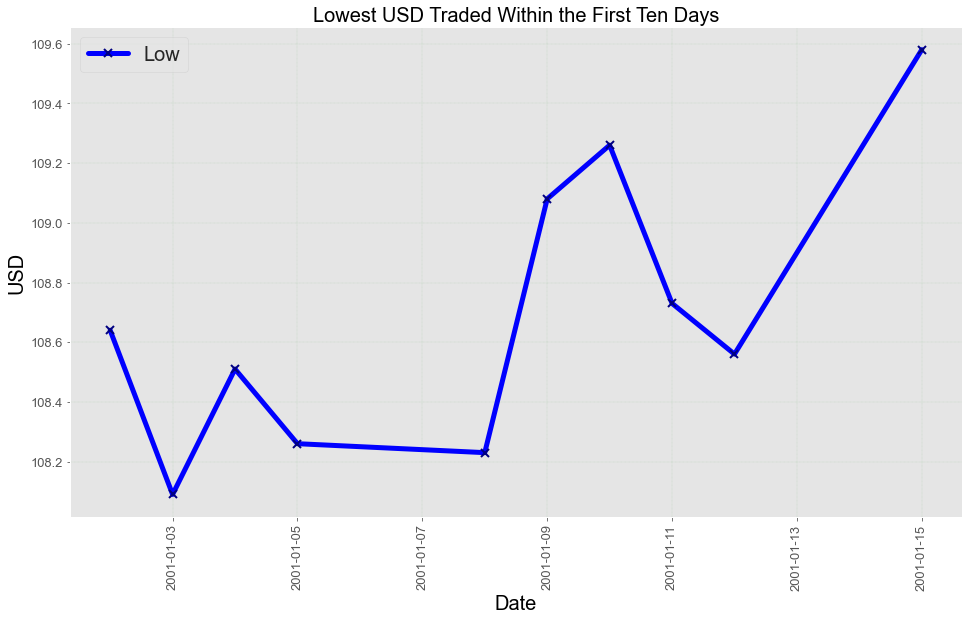

In [36]:
plt.figure(figsize=(16,9))
plt.plot(first_10_days.Date, first_10_days["Low"], marker="x", mew=2, ls='-', lw=5, c="b", ms=8, mec="navy")
plt.grid(c="g", ls="dotted", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20, c="black")
plt.ylabel("USD", fontsize=20, color="black")
plt.title("Lowest USD Traded Within the First Ten Days", fontsize=20, color="black")
plt.legend(["Low"], fontsize=20)

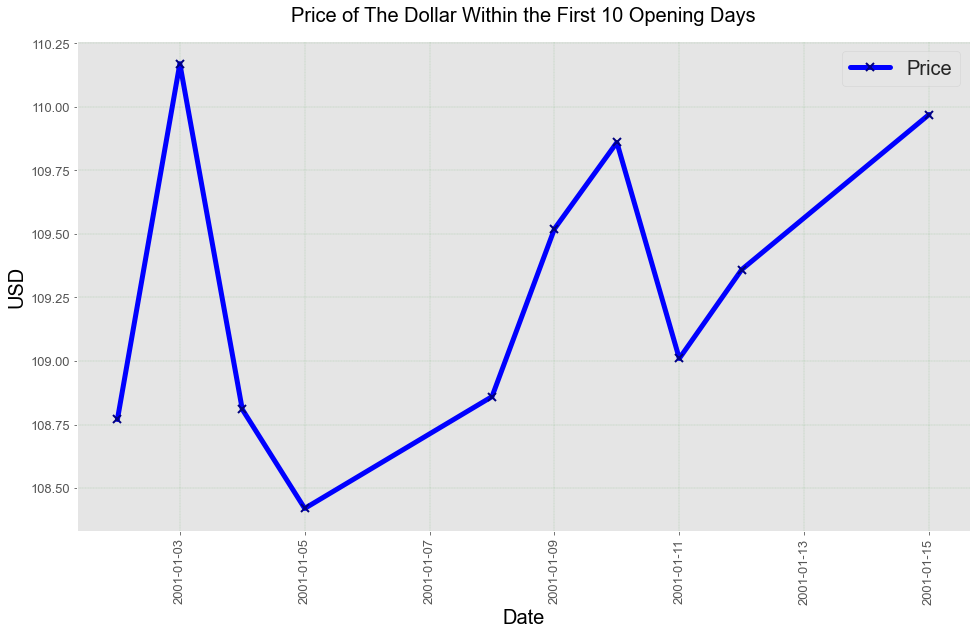

In [37]:
plt.figure(figsize=(16,9))
plt.plot(first_10_days.Date, first_10_days["Price"], marker="x", mew=2, ls='-', lw=5, c="b", ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20, c="black")
plt.ylabel("USD", fontsize=20, color="black")
plt.title("Price of The Dollar Within the First 10 Opening Days", fontsize=20, pad=20, color="black")
plt.legend(["Price"], fontsize=20)

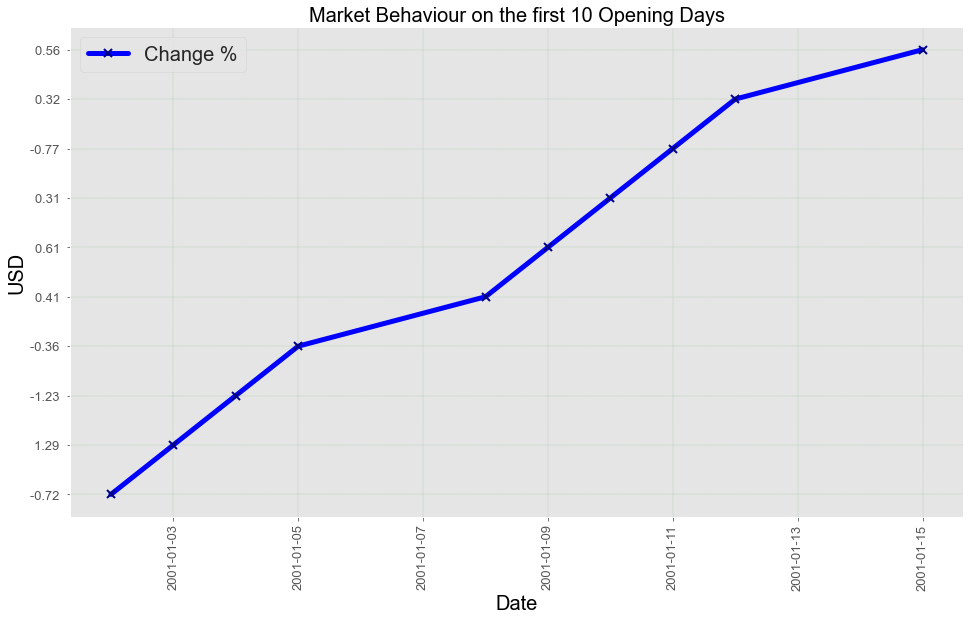

In [38]:
plt.figure(figsize=(16,9))
plt.plot(first_10_days.Date, first_10_days["Change %"], marker="x", mew=2, ls='-', lw=5, c="b", ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20, c="black")
plt.ylabel("USD", fontsize=20, color="black")
plt.title("Market Behaviour on the first 10 Opening Days", fontsize=20, color="black")
plt.legend(["Change %"], fontsize=20)

The dollar was very promising in it's first 10 days with a constant upward change

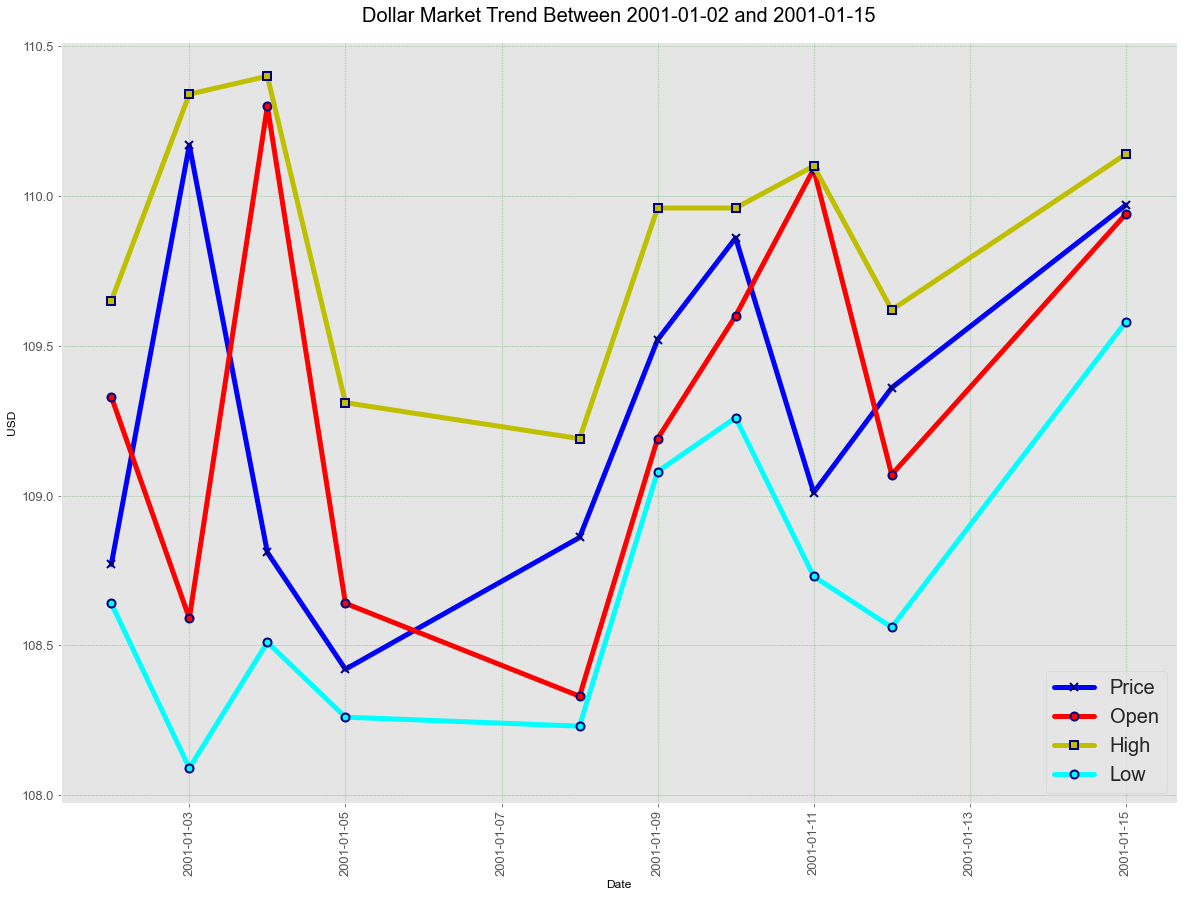

In [39]:
plt.figure(figsize=(20,14))
plt.plot(first_10_days.Date, first_10_days["Price"], marker="x", mew=2, ls='-', lw=5, c="b", ms=8, mec="navy")
plt.plot(first_10_days.Date, first_10_days["Open"], marker="o", mew=2, ls='-', lw=5, c="r", ms=8, mec="navy")
plt.plot(first_10_days.Date, first_10_days["High"], marker="s", mew=2, ls='-', lw=5, c="y", ms=8, mec="navy")
plt.plot(first_10_days.Date, first_10_days["Low"], marker="o", mew=2, ls='-', lw=5, c="cyan", ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.5, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", c="black")
plt.ylabel("USD", c="black")
plt.title("Dollar Market Trend Between 2001-01-02 and 2001-01-15", fontsize=20, pad=20, c="black")
plt.legend(["Price", "Open", "High", "Low"], fontsize=20)

## **Market Behaviour After 9/11**

In [40]:
dollar.loc[dollar.Date>"2001-09-11"][:10]

Date   Price    Open    High     Low Change %  Year  Month
178 2001-09-17  112.01  111.98  112.72  111.31   -2.23   2001      9
179 2001-09-18  111.92  112.39  112.67  111.78   -0.08   2001      9
180 2001-09-19  111.61  112.31  112.36  111.42   -0.28   2001      9
181 2001-09-20  111.87  111.90  112.22  111.64    0.23   2001      9
182 2001-09-21  113.04  112.58  113.44  111.82    1.05   2001      9
183 2001-09-24  112.84  112.81  113.33  112.47   -0.18   2001      9
184 2001-09-25  112.28  112.89  112.97  112.04   -0.50   2001      9
185 2001-09-26  112.29  112.23  112.64  112.06    0.01   2001      9
186 2001-09-27  112.98  112.75  113.17  112.27    0.61   2001      9
187 2001-09-28  113.48  113.24  113.69  112.88    0.44   2001      9

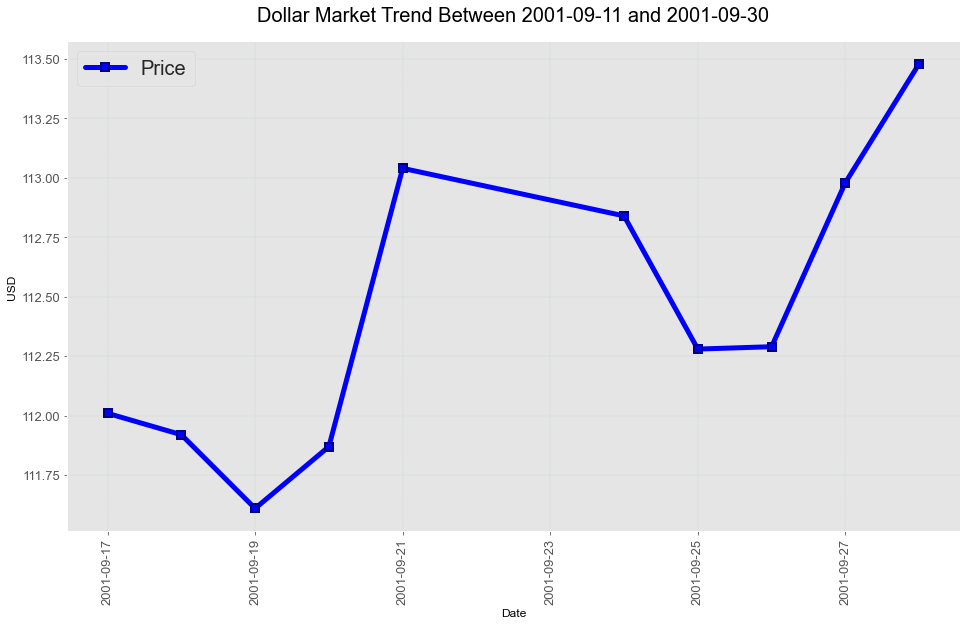

In [41]:
# Let us do a deep dive on how the market reacted the following 10 days
after_911=dollar.loc[dollar.Date>"2001-09-11"][:10]
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(after_911.Date, after_911.Price, marker="s", c="b", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.grid(c="g", alpha=.4, ls="dotted", lw=.3)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", c="black")
plt.ylabel("USD", c="black")
plt.title("Dollar Market Trend Between 2001-09-11 and 2001-09-30", fontsize=20, pad=20, c="black")
plt.legend(["Price"], fontsize=20)

The dollar price fluctuated but came back relatively stronger

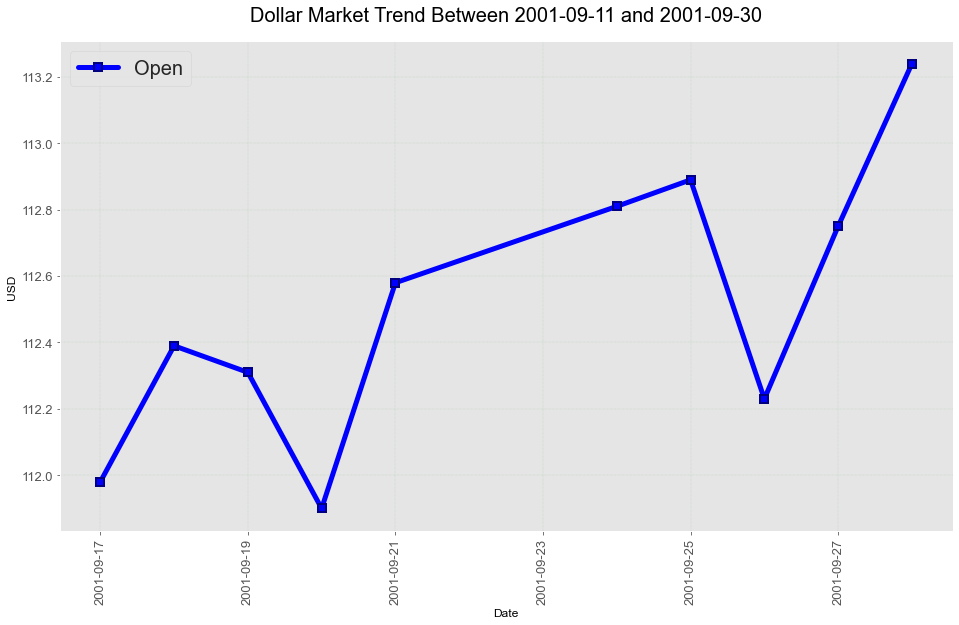

In [42]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(after_911.Date, after_911.Open, marker="s", c="b", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.grid(c="g", alpha=.4, ls="dotted", lw=.3)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", c="black")
plt.ylabel("USD", c="black")
plt.title("Dollar Market Trend Between 2001-09-11 and 2001-09-30", fontsize=20, pad=20, c="black")
plt.legend(["Open"], fontsize=20)

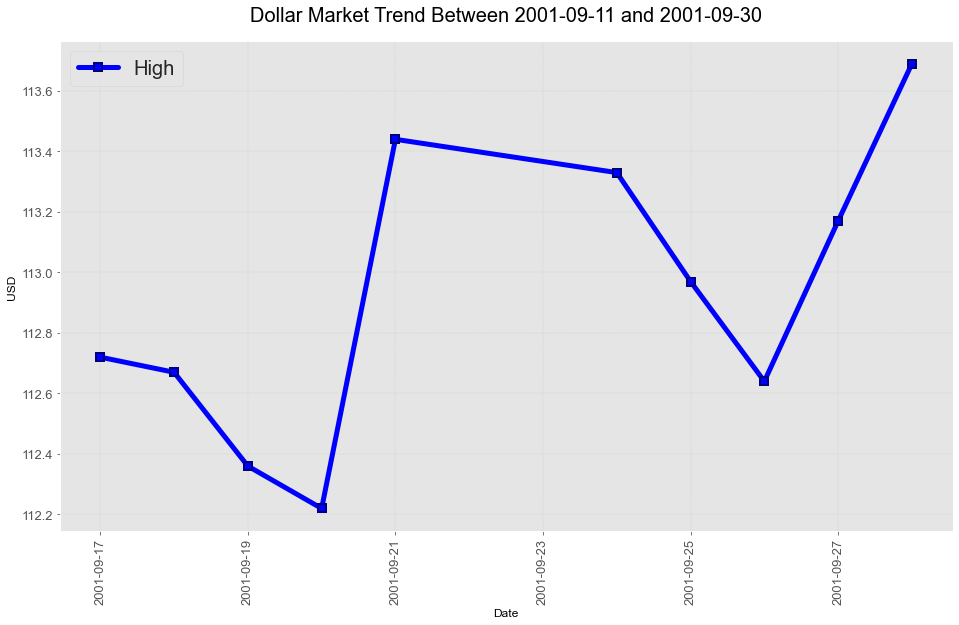

In [43]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(after_911.Date, after_911.High, marker="s", c="b", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.grid(c="g", alpha=.4, ls="dotted", lw=.3)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", c="black")
plt.ylabel("USD", c="black")
plt.title("Dollar Market Trend Between 2001-09-11 and 2001-09-30", fontsize=20, pad=20, c="black")
plt.legend(["High"], fontsize=20)

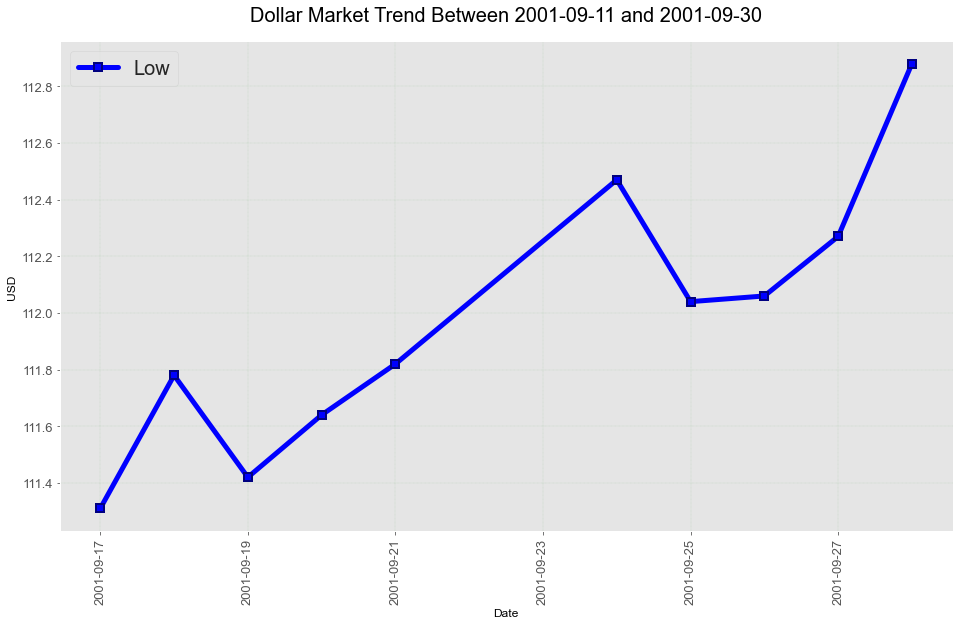

In [44]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(after_911.Date, after_911.Low, marker="s", c="b", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.grid(c="g", alpha=.4, ls="dotted", lw=.3)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", c="black")
plt.ylabel("USD", c="black")
plt.title("Dollar Market Trend Between 2001-09-11 and 2001-09-30", fontsize=20, pad=20, c="black")
plt.legend(["Low"], fontsize=20)

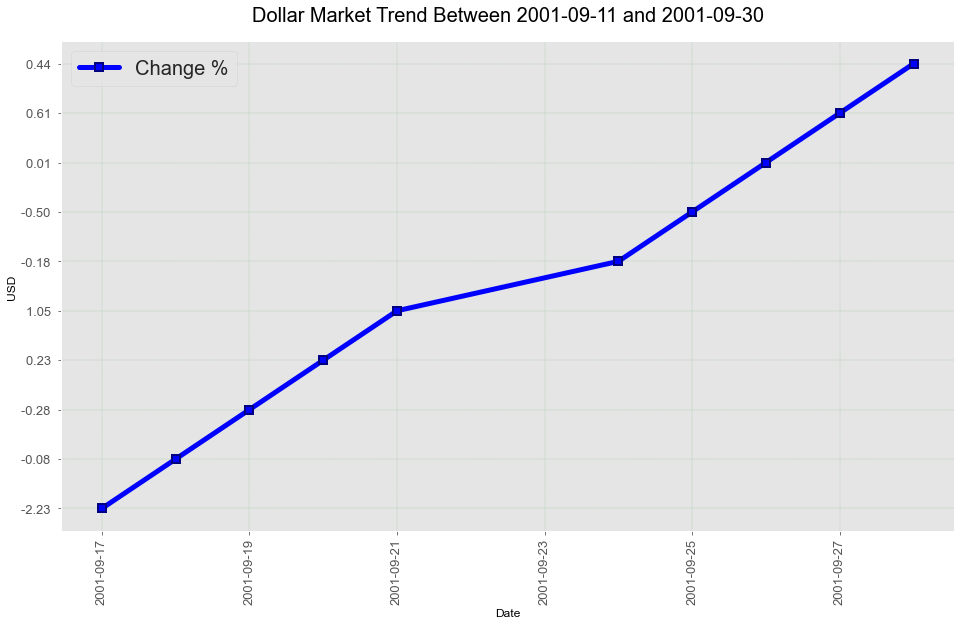

In [45]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(after_911.Date, after_911["Change %"], marker="s", c="b", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.grid(c="g", alpha=.4, ls="dashed", lw=.3)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", c="black")
plt.ylabel("USD", c="black")
plt.title("Dollar Market Trend Between 2001-09-11 and 2001-09-30", fontsize=20, pad=20, c="black")
plt.legend(["Change %"], fontsize=20)

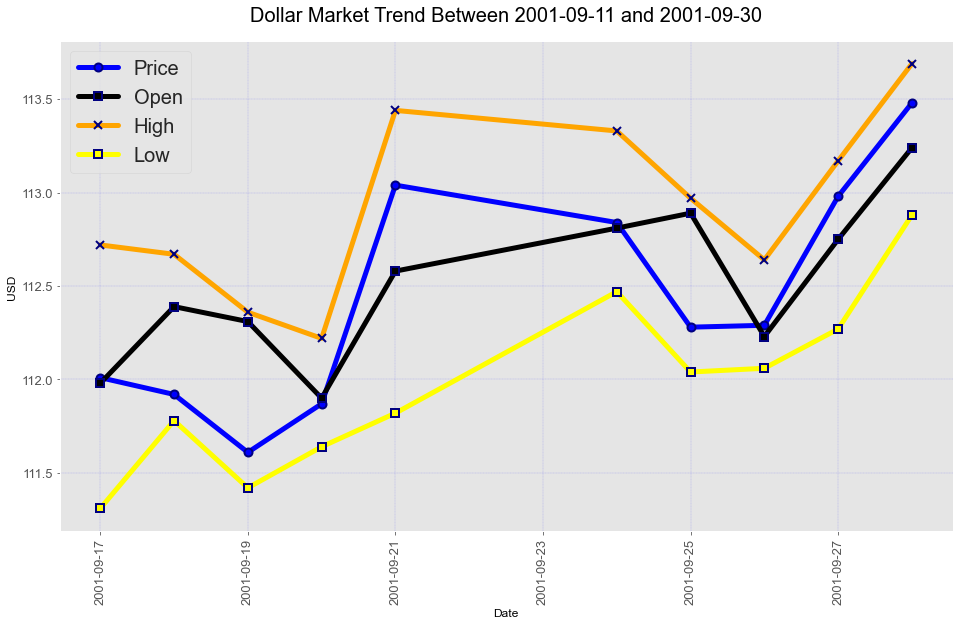

In [46]:
plt.figure(figsize=(16,9))
plt.style.use("ggplot")
plt.plot(after_911.Date, after_911.Price, marker="o", c="b", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.plot(after_911.Date, after_911.Open, marker="s", c="black", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.plot(after_911.Date, after_911.High, marker="x", c="orange", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.plot(after_911.Date, after_911.Low, marker="s", c="yellow", ls="-", lw=5, ms=8, mew=2, mec="navy")
plt.grid(c="b", alpha=.4, ls="dashed", lw=.3)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", c="black")
plt.ylabel("USD", c="black")
plt.title("Dollar Market Trend Between 2001-09-11 and 2001-09-30", fontsize=20, pad=20, c="black")
plt.legend(["Price","Open", "High", "Low"], fontsize=20)

## **Dollar Trend on Every Last Day of the Year**

In [50]:
df0=dollar.query('Date =="2001-12-31"')
df1=dollar.query('Date =="2002-12-31"')
df2=dollar.query('Date =="2003-12-31"')
df3=dollar.query('Date =="2004-12-31"')
df4=dollar.query('Date =="2007-12-31"')
df5=dollar.query('Date =="2008-12-31"')
df6=dollar.query('Date =="2009-12-31"')
df7=dollar.query('Date =="2010-12-31"')
df8=dollar.query('Date =="2012-12-31"')
df9=dollar.query('Date =="2013-12-31"')
df10=dollar.query('Date =="2014-12-31"')
df11=dollar.query('Date =="2015-12-31"')
df12=dollar.query('Date =="2017-12-31"')
df13=dollar.query('Date =="2018-12-31"')
df14=dollar.query('Date =="2019-12-31"')

ds=(df0,df1,df2,df3,df4,df5,df6, df7, df8, df9, df10, df11, df12, df13, df14)
ds

(          Date   Price    Open    High     Low Change %  Year  Month
 252 2001-12-31  116.75  117.26  117.42  116.54   -0.43   2001     12,
           Date   Price    Open   High     Low Change %  Year  Month
 509 2002-12-31  101.85  102.14  102.2  101.82   -0.16   2002     12,
           Date  Price   Open  High    Low Change %  Year  Month
 763 2003-12-31  86.92  86.98  87.2  86.36   -0.09   2003     12,
            Date  Price   Open   High    Low Change %  Year  Month
 1022 2004-12-31  80.85  80.64  81.11  80.39    0.40   2004     12,
            Date  Price   Open   High    Low Change %  Year  Month
 1782 2007-12-31  76.69  75.98  76.75  75.96    0.62   2007     12,
            Date  Price   Open   High    Low Change %  Year  Month
 2041 2008-12-31  81.15  80.58  81.76  80.57    0.64   2008     12,
            Date  Price   Open   High    Low Change %  Year  Month
 2302 2009-12-31  77.86  77.89  78.02  77.41   -0.06   2009     12,
            Date  Price   Open   High    Low Chan

In [52]:
new1 = df0.append(df1)
new2 = new1.append(df2)
new3 = new2.append(df3)
new4 = new3.append(df4)
new5 = new4.append(df5)
new6 = new5.append(df6)
new7 = new6.append(df7)
new8 = new7.append(df8)
new9 = new8.append(df9)
new10 = new9.append(df10)
new11 = new10.append(df11)
new12 = new11.append(df12)
new13 = new12.append(df13)
new14 = new13.append(df14)
final_df = new14
final_df

Date   Price    Open    High     Low Change %  Year  Month
252  2001-12-31  116.75  117.26  117.42  116.54   -0.43   2001     12
509  2002-12-31  101.85  102.14  102.20  101.82   -0.16   2002     12
763  2003-12-31   86.92   86.98   87.20   86.36   -0.09   2003     12
1022 2004-12-31   80.85   80.64   81.11   80.39    0.40   2004     12
1782 2007-12-31   76.69   75.98   76.75   75.96    0.62   2007     12
2041 2008-12-31   81.15   80.58   81.76   80.57    0.64   2008     12
2302 2009-12-31   77.86   77.89   78.02   77.41   -0.06   2009     12
2562 2010-12-31   79.03   79.46   79.52   78.78   -0.62   2010     12
3083 2012-12-31   79.77   79.67   79.85   79.58    0.11   2012     12
3344 2013-12-31   80.03   80.00   80.22   79.97    0.04   2013     12
3605 2014-12-31   90.27   89.93   90.30   89.86    0.31   2014     12
3866 2015-12-31   98.63   98.22   98.78   98.18    0.37   2015     12
4388 2017-12-31   92.28   92.28   92.28   92.28    0.18   2017     12
4649 2018-12-31   96.17   96.40   96.51   96.00   -0.24   2018     12
4910 2019-12-31   96.39   96.73   96.73   96.36   -0.36   2019     12

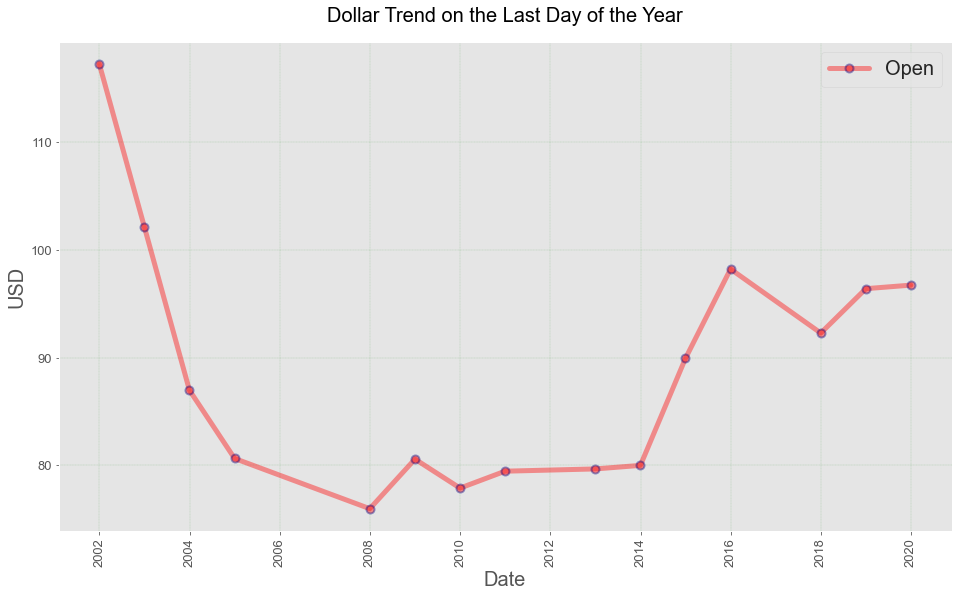

In [55]:
plt.figure(figsize=(16,9))
plt.plot(final_df.Date, final_df.Open, marker="o", c="r", ls="-", lw=5, alpha=.4, mew=2, ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.title("Dollar Trend on the Last Day of the Year", c="black", pad=20, fontsize=20)
plt.legend(["Open"], fontsize=20)

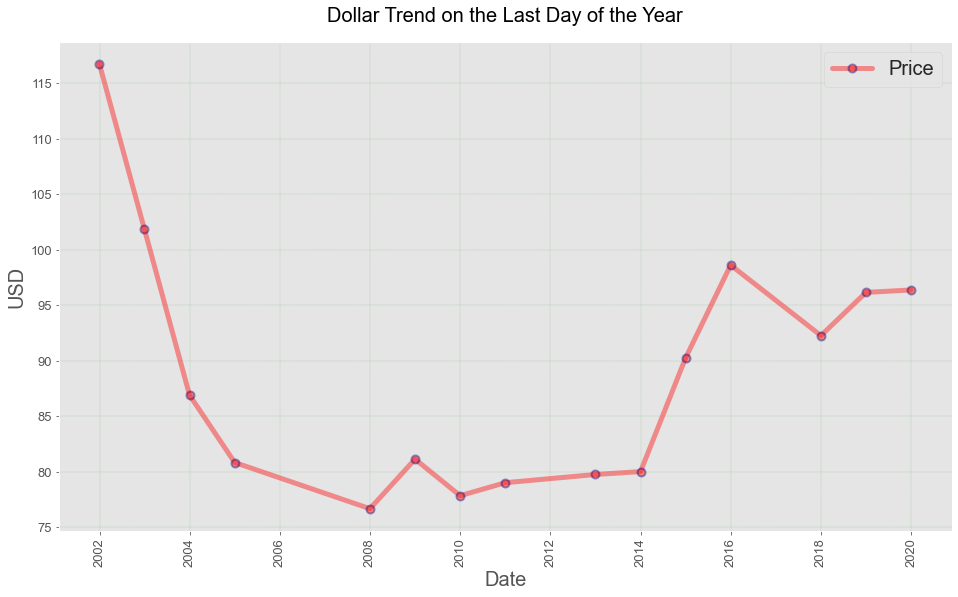

In [56]:
plt.figure(figsize=(16,9))
plt.plot(final_df.Date, final_df.Price, marker="o", c="r", ls="-", lw=5, alpha=.4, mew=2, ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.title("Dollar Trend on the Last Day of the Year", c="black", pad=20, fontsize=20)
plt.legend(["Price"], fontsize=20)

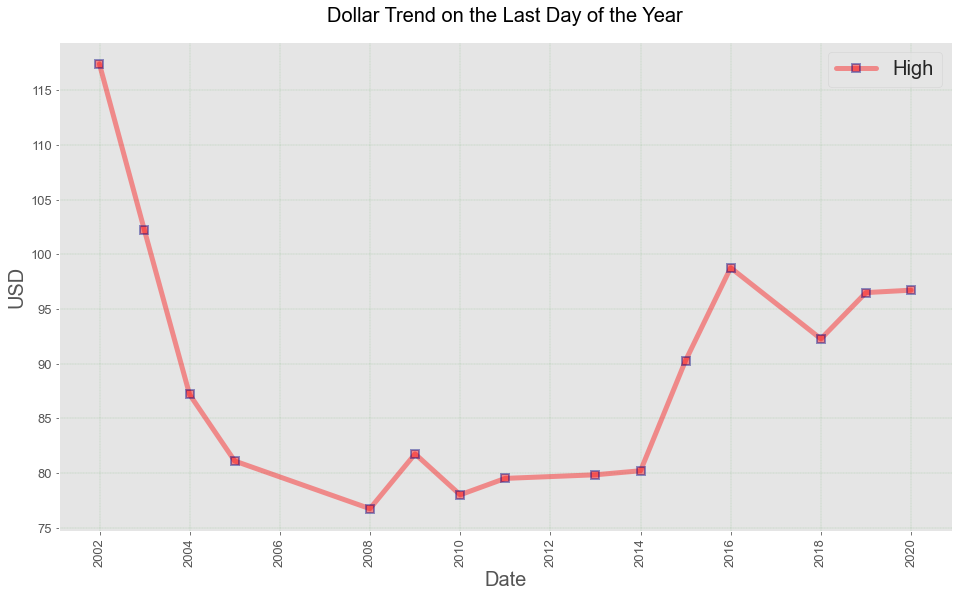

In [57]:
plt.figure(figsize=(16,9))
plt.plot(final_df.Date, final_df.High, marker="s", c="r", ls="-", lw=5, alpha=.4, mew=2, ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.title("Dollar Trend on the Last Day of the Year", c="black", pad=20, fontsize=20)
plt.legend(["High"], fontsize=20)

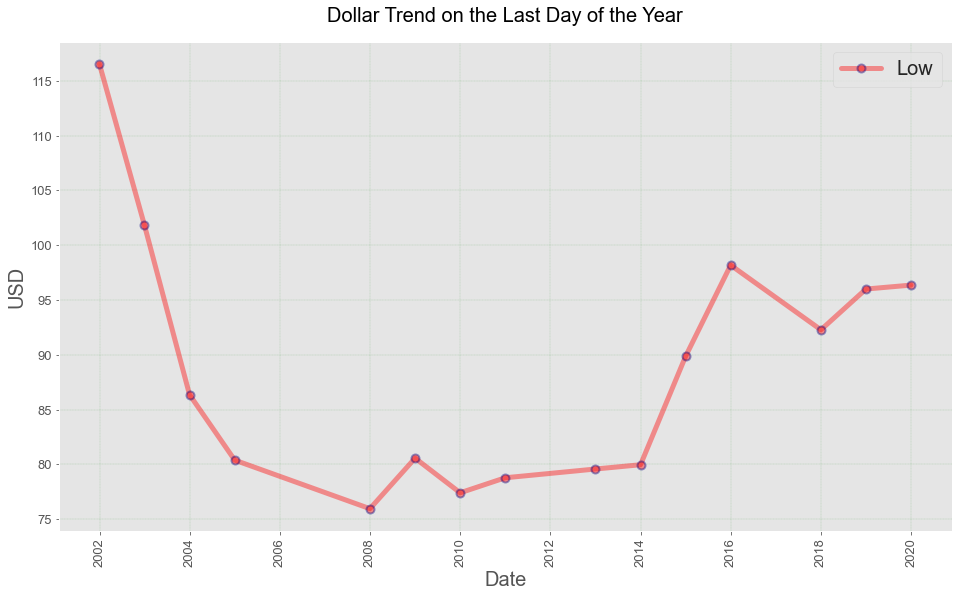

In [58]:
plt.figure(figsize=(16,9))
plt.plot(final_df.Date, final_df.Low, marker="o", c="r", ls="-", lw=5, alpha=.4, mew=2, ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.title("Dollar Trend on the Last Day of the Year", c="black", pad=20, fontsize=20)
plt.legend(["Low"], fontsize=20)

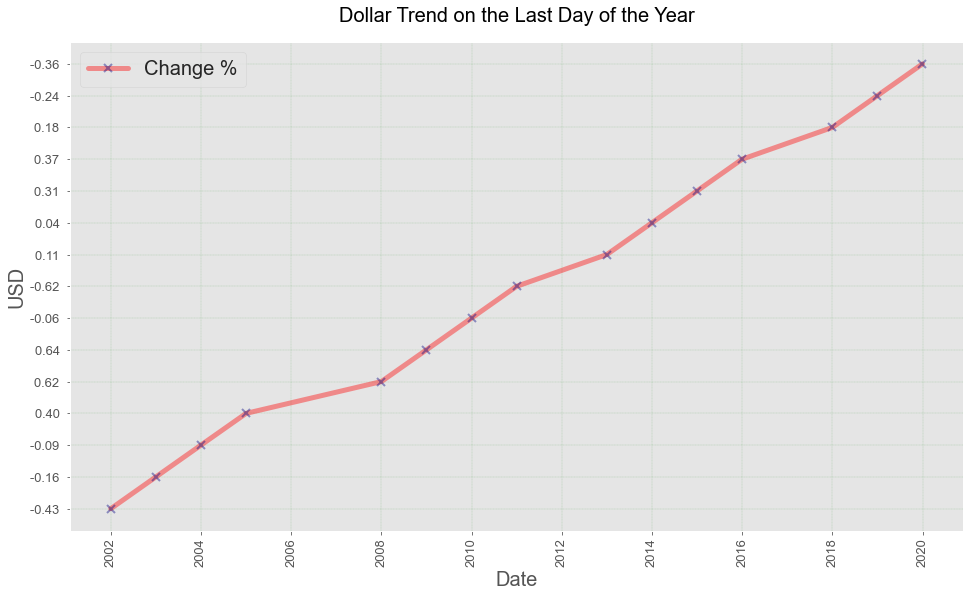

In [62]:
plt.figure(figsize=(16,9))
plt.plot(final_df.Date, final_df["Change %"], marker="x", c="r", ls="-", lw=5, alpha=.4, mew=2, ms=8, mec="navy")
plt.grid(c="g", ls="dashed", lw=.3, alpha=.4)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which="major", labelsize=13)
plt.xlabel("Date", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.title("Dollar Trend on the Last Day of the Year", c="black", pad=20, fontsize=20)
plt.legend(["Change %"], fontsize=20)

In [1]:
import jovian
jovian.commit(filename="US $.ipynb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ashioyajotham/us


'https://jovian.ai/ashioyajotham/us'